# Numerical modeling Exercise 2
# Population dynamics of the sinking phytoplankton population

Dr. Ken Andersen's lab 
Date: 8-02-22

In [1549]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [1550]:
# setteling velocity
u = 0.04    # meters per second

# diffusion velocity
D = 0.5   # meters per second

#incident light
I_0 = 350  # umol photons m-2 s-1

# depth
depth = 100    # meters


# background turbidity
K_bg = 0.2  #m-1


# number of grids
n_d = 50

# size of each depth grid
delta_z = depth /n_d 


# specific light attenuation of phytoplankton
k = x = 15*(10**(-12))
k


# p_max
p_max = 0.4   # per hour


# H half-saturation constant of light-limited growth 
H = 30



# specific loss rate
l = 0.01

In [1551]:
# depth grid
z = np.arange((0.5 * delta_z),(depth - 0.5*delta_z)+delta_z,delta_z)
z

array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21., 23., 25.,
       27., 29., 31., 33., 35., 37., 39., 41., 43., 45., 47., 49., 51.,
       53., 55., 57., 59., 61., 63., 65., 67., 69., 71., 73., 75., 77.,
       79., 81., 83., 85., 87., 89., 91., 93., 95., 97., 99.])

In [1552]:
# change in light with respect to phytoplankton concentration
#I_zt = np.zeros(n_d)

In [1553]:
# ø grid 
phi = np.zeros(n_d)

# advection flux
j_a = np.zeros(n_d+1)

# diffusion flux
j_d = np.zeros(n_d+1)

# total flux
j = np.zeros(n_d+1)


# dphi/dt
dphi_dt = np.zeros(n_d)
domega_dt = np.zeros(n_d)

g = np.zeros(n_d)

# Phytoplankton concentration
#omega = np.zeros(n_d)        # cells m-3
#omega[4] = 3
#omega
g

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [1554]:
t = (0,1000)
t

(0, 1000)

## Initial conditions

In [1555]:
#phi = np.random.randint(1,9,n_d)
phi= np.ones(n_d)
for i in range(len(phi)):
    phi[i] = phi[i] * (10**3)


phi[0] = 0
phi[n_d-1] = 0
phi

array([   0., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000.,    0.])

In [1556]:
def calc_light(phi,k):
    
    light_integral = np.cumsum(phi)*delta_z*k
    I_zt = I_0*(np.e**(- K_bg * z - light_integral))
    return I_zt

In [1557]:
I_zt = calc_light(phi,k)
I_zt

array([2.86555764e+02, 1.92084067e+02, 1.28757797e+02, 8.63089296e+01,
       5.78546039e+01, 3.87810996e+01, 2.59957477e+01, 1.74254703e+01,
       1.16806417e+01, 7.82976804e+00, 5.24845031e+00, 3.51814135e+00,
       2.35828060e+00, 1.58080271e+00, 1.05964372e+00, 7.10300403e-01,
       4.76128585e-01, 3.19158525e-01, 2.13938351e-01, 1.43407161e-01,
       9.61286918e-02, 6.44369872e-02, 4.31934029e-02, 2.89534030e-02,
       1.94080458e-02, 1.30096018e-02, 8.72059660e-03, 5.84559054e-03,
       3.91841640e-03, 2.62659299e-03, 1.76065788e-03, 1.18020423e-03,
       7.91114533e-04, 5.30299914e-04, 3.55470652e-04, 2.38279097e-04,
       1.59723250e-04, 1.07065693e-04, 7.17682783e-05, 4.81077142e-05,
       3.22475642e-05, 2.16161881e-05, 1.44897638e-05, 9.71277882e-06,
       6.51067015e-06, 4.36423258e-06, 2.92543250e-06, 1.96097599e-06,
       1.31448148e-06, 8.81123283e-07])

In [1558]:
#p_I = p_max * I_zt/(H + I_zt)
#p_I

In [1559]:
def diff_ode(t,phi):

    for i in range(1,n_d):  
        
        # advection flux
        j_a[i] = u * phi[i-1]
        j_a[0] = 0
        j_a[n_d] = 0
        
        
        # diffusionn flux
        j_d[i] = -D * (phi[i] - phi[i-1])/delta_z
        j_d[0] = 0
        j_d[n_d] = 0
    
    # advection flux + diffusion flux
    j = j_a + j_d  
    
    # change in flux with respect to time
    for i in range(1,n_d-1):
        dphi_dt[i] = -(j[i+1] - j[i])/delta_z
            
    
    light_integral = np.cumsum(phi)*delta_z*k
    
    I_zt = I_0*(np.e**(- K_bg * z - light_integral))
    
    
    # change in light with time and depth
    
    # change in specific production rate with respect to time and depth
    p_I = p_max * I_zt/(H + I_zt)
    
    # growth rate with respect to time and depth
    g = (p_I*phi) - (l*phi)
    
    for i in range(1,n_d-1):
        dphi_dt[i] = g[i] + dphi_dt[i]
        
    return dphi_dt

In [1525]:
soln = solve_ivp(diff_ode,t,phi)

In [1526]:
omega = soln.y

In [1527]:
omega.shape

(50, 238)

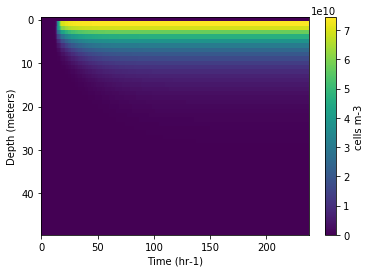

In [1545]:
plt.xlabel('Time (hr-1)')
plt.ylabel('Depth (meters)')
           
plt.imshow(omega,cmap = 'viridis', aspect = 'auto') 
cb = plt.colorbar()
cb.set_label('cells m-3')
#plt.imsave('/users/manasi/Documents/phytoplantkon_light_react-advct-diff.jpg',omega, format = 'jpg',)

In [1546]:
d1 = omega[:,200]


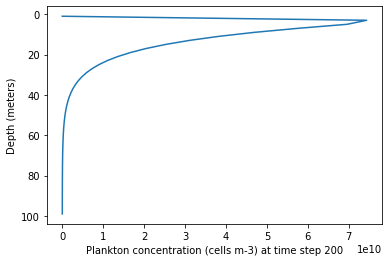

In [1547]:
plt.plot(d1,z)
plt.axis()
plt.xlabel('Plankton concentration (cells m-3) at time step 200')
plt.ylabel('Depth (meters)')
plt.gca().invert_yaxis()

In [1539]:
plt.imsave??

Signature: plt.imsave(fname, arr, **kwargs)
Docstring:
Save an array as an image file.

Parameters
----------
fname : str or PathLike or file-like
    A path or a file-like object to store the image in.
    If *format* is not set, then the output format is inferred from the
    extension of *fname*, if any, and from :rc:`savefig.format` otherwise.
    If *format* is set, it determines the output format.
arr : array-like
    The image data. The shape can be one of
    MxN (luminance), MxNx3 (RGB) or MxNx4 (RGBA).
vmin, vmax : scalar, optional
    *vmin* and *vmax* set the color scaling for the image by fixing the
    values that map to the colormap color limits. If either *vmin*
    or *vmax* is None, that limit is determined from the *arr*
    min/max value.
cmap : str or `~matplotlib.colors.Colormap`, optional
    A Colormap instance or registered colormap name. The colormap
    maps scalar data to colors. It is ignored for RGB(A) data.
    Defaults to :rc:`image.cmap` ('viridis').
fo

In [1531]:
#tt = np.e**(-(z-50)**2/5)
#for i in tt:
#    i = int(i)

#xt = np.arange(0,10,1)

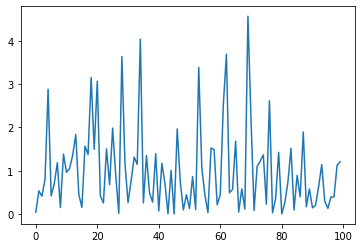

In [1532]:
plt.plot(xt,tt)